In [141]:
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import math

In [142]:
data, target = datasets.load_diabetes(return_X_y=True, as_frame=True)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930



Dataframe:
* age - age in years (целевая перменная)
* sex
* bmi - body mass index
* bp - average blood pressure
* s1 - tc, total serum cholesterol
* s2 - ldl, low-density lipoproteins
* s3 - hdl, high-density lipoproteins
* s4 - tch, total cholesterol / HDL
* s5 - ltg, possibly log of serum triglycerides level
* s6 - glu, blood sugar level



Уменьшаем размерность с помощью sklearn.discriminant_analysis.LinearDiscriminantAnalysis, как параметр передаём n_components=1

In [143]:
lda = LinearDiscriminantAnalysis(n_components=1)
transformed = lda.fit_transform(data, target)
print(f"Размерность data: {transformed.shape}")

Размерность data: (442, 1)


In [144]:
def mse(y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def msle(y_true, y_pred):
    actual = np.clip(y_true, 0, None)
    predicted = np.clip(y_pred, 0, None)
    return np.mean((np.log1p(predicted) - np.log1p(actual)) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def approx(x, a, b):
      return np.array(a * np.array(x) + b)

In [145]:
def grad_mse(d, tar):
    a, b, n = 1, 1, -2 / len(d)
    multiplier = n * learning_rate
    for i in range(n_iterations):
        delta = tar - approx(d, a, b)
        a, b = ((a - multiplier * sum(d * delta)), (b - multiplier * sum(delta)))
    return (a, b)

In [146]:
def grad_mae(d, tar):
    a, b, n = 1, 1, 1 / len(d)
    multiplier = n * learning_rate
    for i in range(n_iterations):
        delta = tar - approx(d, a, b)
        a, b = ((a - multiplier * sum((- delta / abs(delta)) * d)),
                    b - multiplier * sum((- delta / abs(delta))))
    return (a, b)

In [147]:
def grad_r(d, tar):
    a, b, n = 1, 1, 1 / len(d)
    multiplier = n * learning_rate
    for i in range(n_iterations):
        delta = tar - approx(d, a, b)
        a, b = ((a - multiplier * sum((- delta / abs(delta) * math.sqrt(len(d))) * d)),
                    b - multiplier * sum((- delta / abs(delta) * math.sqrt(len(d)))))
    return (a, b)

In [148]:
def grad_rr(d, tar):
    a, b, n = 1, 1, len(d)
    multiplier = learning_rate * 2 * (n ** 2)
    for i in range(n_iterations):
        del1, del2 = approx(d, a, b) - tar, (tar * (n - 1)) ** 2
        a, b = (a - multiplier * sum((del1 * d) / del2),
                     b - multiplier * sum(del1 / del2))
    return (a, b)

grad_mse:
     кастомная			готовая
mse  2962.9038262379136     2962.9038262379136    
mae  43.75503613338253      43.75503613338253     
msle 0.17456677174655788    0.17456677174655788   
rmse 54.43256218696593      54.43256218696593     



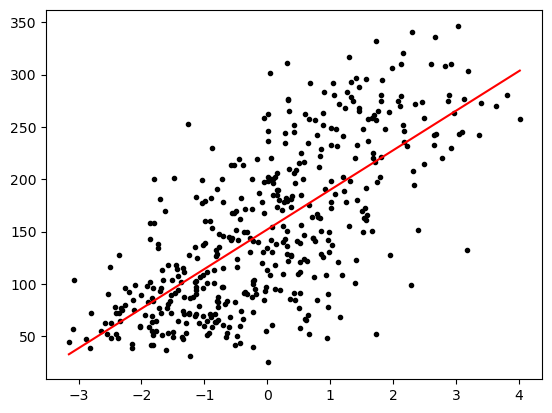

grad_mae:
     кастомная			готовая
mse  2969.806187020619      2969.806187020619     
mae  43.73293874629309      43.73293874629309     
msle 0.17395992641984295    0.17395992641984295   
rmse 54.49592816918177      54.49592816918177     



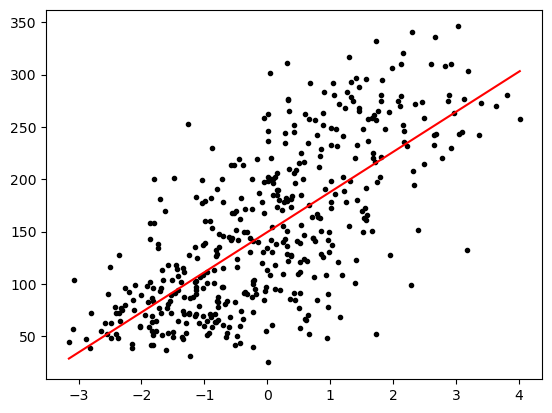

grad_r:
     кастомная			готовая
mse  2969.8014792886734     2969.8014792886734    
mae  43.73315640723632      43.73315640723632     
msle 0.17398219456938208    0.17398219456938208   
rmse 54.495884975736224     54.495884975736224    



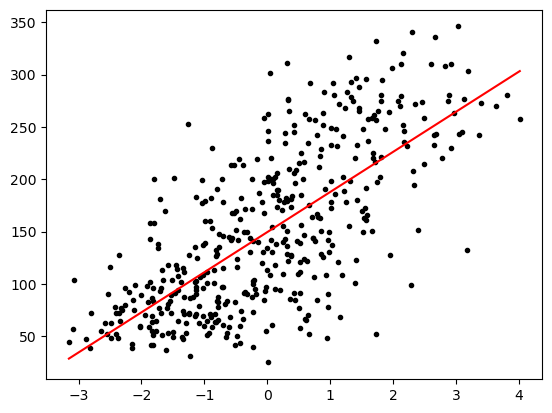

grad_rr:
     кастомная			готовая
mse  6265.129056496546      6265.129056496546     
mae  61.478970974712205     61.478970974712205    
msle 0.2722323981538905     0.2722323981538905    
rmse 79.1525682242626       79.1525682242626      



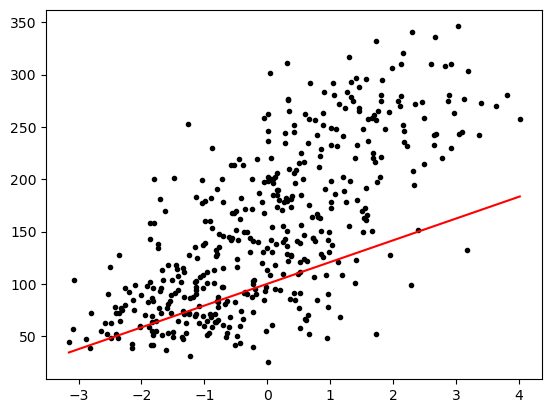

Full:


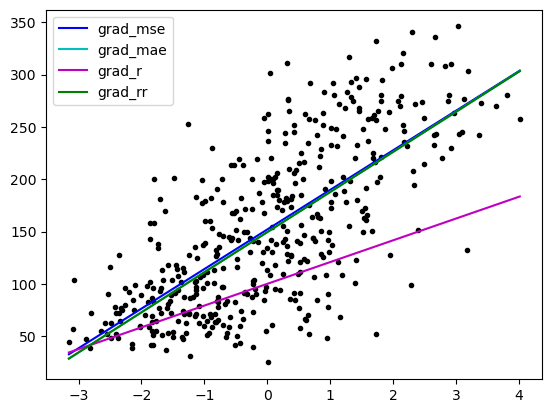

In [150]:
def run_grad(transf, targets, func, name):
    k1, k2 = func(transf.reshape(442), targets)
    predicts = []
    for i in transf.reshape(442):
        predicts.append(k1 * i + k2)
    
    # print(predicts)
    
    print(name + ":")
    print("     кастомная\t\t\tготовая")
    print("mse  {:<22} {:<22}".format(mse(predicts, targets), metrics.mean_squared_error(predicts, targets)))
    print("mae  {:<22} {:<22}".format(mae(predicts, targets), metrics.mean_absolute_error(predicts, targets)))
    print("msle {:<22} {:<22}".format(msle(predicts, targets), metrics.mean_squared_log_error(predicts, targets)))
    print("rmse {:<22} {:<22}".format(rmse(predicts, targets), math.sqrt(metrics.mean_squared_error(predicts, targets))))
    print()

    plt.plot(transf, targets, 'k.')
    plt.plot(x_vals, k1 * x_vals + k2, 'r-')
    plt.show()

    return (k1, k2)


n_iterations = 10000
learning_rate = 0.1
min_val, max_val = min(transformed), max(transformed)
x_vals = np.linspace(start=min_val, stop=max_val, endpoint=True)

coeff1 = run_grad(transformed, target, grad_mse, "grad_mse")
coeff2 = run_grad(transformed, target, grad_mae, "grad_mae")
coeff3 = run_grad(transformed, target, grad_r, "grad_r")
coeff4 = run_grad(transformed, target, grad_rr, "grad_rr")

print("Full:")
plt.plot(transformed, target, 'k.')
plt.plot(x_vals, coeff1[0] * x_vals + coeff1[1], 'b-', label="grad_mse")
plt.plot(x_vals, coeff3[0] * x_vals + coeff3[1], 'c-', label="grad_mae")
plt.plot(x_vals, coeff4[0] * x_vals + coeff4[1], 'm-', label="grad_r")
plt.plot(x_vals, coeff2[0] * x_vals + coeff2[1], 'g-', label="grad_rr")
plt.legend()
plt.show()